In [2]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc

GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nfh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim']


In [25]:
read_list =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(read_list) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb10v106_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(read_list)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

LH = np.zeros(len(read_list))
print("[", end="")
for i in range(len(read_list)): 
  print(tjy.H_find(read_list[i], 0.6, 1e-04), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb10v106_c004.dat', 'phb10v106_c005.dat', 'phb10v106_c006.dat', 'phb10v106_c008.dat', 'phb10v106_c010.dat', 'phb10v106_c015.dat', 'phb10v106_c020.dat', 'phb10v106_c030.dat', 'phb10v106_c040.dat', 'phb10v106_c050.dat']
[124.01466135458166, 114.80167115902964, 106.67127243503886, 91.75604651162789, 80.58985319731276, 66.98473853580047, 60.40243792325057, 51.77253658536585, 45.40853928773318, 40.00499403578529]


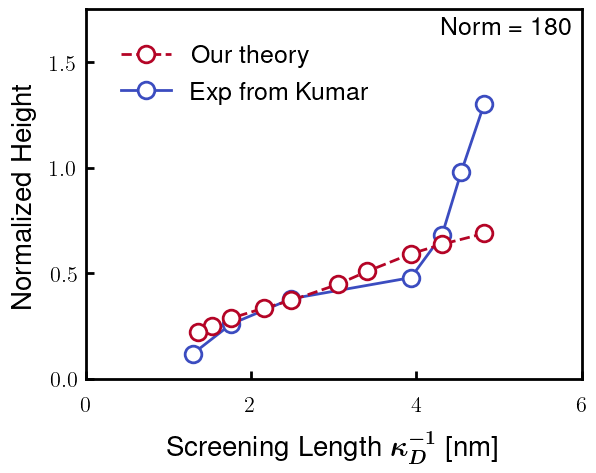

In [26]:
#@title
SrCs = [4, 5, 6, 8, 10, 15, 20, 30, 40, 50] #[1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 75, 100] 
Sr_equil = [124.01466135458166, 114.80167115902964, 106.67127243503886, 91.75604651162789, 80.58985319731276, 66.98473853580047, 60.40243792325057, 51.77253658536585, 45.40853928773318, 40.00499403578529]
#Sr_equil = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 5.492755796178344, 5.367826231386024, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]
#Sr_meta = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 8.499643355392594, 7.995791556728231, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]

norm = 180
Sr_equil = np.divide(Sr_equil,  norm)
#Sr_meta = np.divide(Sr_meta, 21.5)
CsDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in SrCs]

#Sr2014 pH2.4 fitted in Illustrator
x = [4, 4.5, 5, 6, 15, 30, 55]
y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]
xDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in x]

f, ax = plt.subplots(1,1)

ax.plot(CsDeb, Sr_equil, 'o--', color=warm_red, mew=2, ms=12, markerfacecolor='w', zorder=3, label="Our theory")
ax.plot(xDeb, y, 'o-', color=cool_blue, mew=2, ms=12, markerfacecolor='w',label="Exp from Kumar")

#ax.plot(CsDeb, Sr_equil, 'k', label="Our Theory")
#ax.plot(CsDeb, Sr_equil, 'r', mew=2.5,ms=12,markerfacecolor='w', zorder=3, label="Our theory")
#ax.plot(CsDeb[:len(Sr_meta)], Sr_meta, 'o-',color="0.6", mew=2.5,ms=12,markerfacecolor='w', zorder=2, label="Metastable")

plt.gca().text(0.85, 0.95, 'Norm = {:d}'.format(norm), transform=plt.gca().transAxes, fontsize=18,
       ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
ax.set_title(r"")
ax.set_ylim(0, 1.75) #0.5
plt.yticks([0.0, 0.5, 1.0, 1.5])
plt.xticks([0, 2, 4, 6, 8])
ax.set_xlim(0,6) #2

ax.set_xlabel(r'Screening Length $\bm{\kappa_D^{-1}}$'+' [nm]')
ax.set_ylabel('Normalized Height')

leg = ax.legend(loc = 2,frameon=False,fontsize=18)
leg.get_frame().set_linewidth(0.0)

plt.show()

In [ ]:
#@title
#From Erika: sequences.docx
L_seq = "MGCETRLSFTSVGSITSGYSQSSQVFGRSAYSGLQSSSYLMSARAFPAYYTSHVQEEQsEVEETIEATKAEEAKDEPPsEGEAEEEEKEKEEGEEEEGAEEEEAAKDEsEDAKEEEGGEGEEEDtKEsEEEEKKEEsAGEEQAAKKKDLEHHHHHH"
M_seq = "MGCWYSTFSGsITGPLYTHRQPsVTISSKIQKTKVEAPKLKVQHKFVEEIIEETKVEDEKsEMEDALTVIAEELAAsAKEEKEEAEEKEEEPEVEKsPVKsPEAKEEEEGEKEEEEEGQEEEEEEDEGVKsDQAEEGGsEKEGssEKDEGEQEEEGEtEAEGEGEEAEAKEEKKTEGKVEEMAIKEEIKVEKPEKAKsPVPKsPVEEVKPKPEAKAGKDEQKEEEKVEEKKEVAKEsPKEEKVEKKEEKPKDVPDKKKAEsPVKEKAVEEMITITKSVKVsLEKDTKEEKPQQQEKVKEKAEEEGGsEEEVGDKsPQESKKEDIAINGEVEGKEEEEQETQEKGsGQEEEKGVVTNGLDVsPAEEKKGEDRSDDKVVVTKKVEKITSEGGDGATKYITKSVTVTQKVEEHEETFEEKLVSTKKVEKVTSHAIVKEVTQGDLEHHHHHH"
H_seq = "MGCWYMSEFTSMSTHIKVKSEEKIKVVEKSEKETVIVEEQTEEIQVTEEVTEEEDKEAQGEEEEEAEEGGEEAATTSPPAEEAAsPEKETKSPVKEEAKsPAEAKsPAEAKsPAEAKsPAEVKsPAVAKsPAEVKsPAEVKsPAEAKsPAEAKsPAEVKsPATVKsPGEAKsPAEAKsPAEVKsPVEAKsPAEAKsPAsVKsPGEAKsPAEAKsPAEVKsPATVKsPVEAKsPAEVKsPVTVKsPAEAKsPVEVKsPAsVKsPSEAKsPAGAKsPAEAKsPVVAKsPAEAKsPAEAKPPAEAKsPAEAKsPAEAKsPAEAKsPAEAKsPVEVKsPEKAKSPVKEGAKsLAEAKsPEKAKsPVKEEIKPPAEVKsPEKAKsPMKEEAKsPEKAKTLDVKsPEAKtPAKEEAKRPADIRsPEQVKsPAKEEAKsPEKEETRTEKVAPKKEEVKsPVEEVKAKEPPKKVEEEKTPATPKTEVKESKKDEAPKEAQKPKAEEKEPLTEKPKDsPGEAKKEEAKEKKAAAPEEETPAKLGVKEEAKPKEKAEDAKAKEPSKPSEKEKPKKEEVPAAPEKKDTKEEKTTESKKPEEKPKMEAKAKEEDKGLPQEPSKPKTEKAEKSSSTDQKDSQPSEKAPEDKLLEHHHHHH"

def charge_dist(sequence):
  charge_dist = []
  for i in sequence:
    charge_dist.append(aa_to_charge(i))

  return charge_dist

def aa_to_charge(aa):
  switcher = {
      "E": -1,
      "R": +1,
      "K": +1,
      "D": -1,
      "H": +0, #+1 #not part of original gene
  }
  return switcher.get(aa, 0) #If not in switcher, charge = 0

def charge_dist_ph(sequence, ph):
  charge_dist = []
  for i in sequence:
    charge_dist.append(aa_to_charge_ph(i, ph))

  return charge_dist

def aa_to_charge_ph(aa, ph):
  #Source: https://www.sigmaaldrich.com/US/en/technical-documents/technical-article/protein-biology/protein-structural-analysis/amino-acid-reference-chart
  pKa = {
      #"G": [2.34, 9.60],
      #"A": [2.34, 9.69],
      #"V": [2.32, 9.62],
      #"L": [2.36, 9.60],
      #"I": [2.36, 9.60],
      #"M": [2.28, 9.21],
      #"F": [1.83, 9.13],
      #"W": [2.38, 9.39],
      #"P": [1.99, 10.60],
      #"S": [2.21, 9.15],
      #"T": [2.09, 9.10],
      #"N": [2.02, 8.80],
      #"Q": [2.17, 9.13],
      #"C": [1.96, 10.28, 8.18],
      #"Y": [2.20, 9.11, 10.07],
      #"D": [1.88, 9.60, 3.65],
      #"E": [2.19, 9.67, 4.25],
      #"K": [2.18, 8.95, 10.53],
      #"R": [2.17, 9.04, 12.48],
      #"H": [1.82, 9.17, 6.00],
      
      #"C": [8.18],
      #"Y": [10.07],
      "D": [3.65, -1*np.inf],
      "E": [4.25, -1*np.inf],
      "K": [np.inf, 10.53],
      "R": [np.inf, 12.48],
      "H": [np.inf, 6.00],
  }

  #Henderson Hasselbalch
  ## HH --> pH  - pKa = log10([base]/[acid])

  #Example: pH 2.4 / pOH 11.6
  ## [D]: 2.4 - 3.65 = -1.25 = log10([A-]/[HA]) -->  [A-]/[HA] = 0.056 
  ##      --> ch = Z- * [A-]/([A-] + [HA])  = -0.053
  ## [K]: 11.6 - 10.53 = 1.07 = log10([BH+]/[B]) --> [BH+]/[B] = 11.75
  ##      --> ch = X+ * [BH+]/([BH+] + [B]) = +0.92

  #print(pKa.get(aa, [np.inf]*2))
  #print(pKa.get(aa, [np.inf]*2)[1])
  a_ha = 10**(ph - pKa.get(aa,[np.inf]*2)[0])
  #print(a_ha)2
  bh_b = 10**(-1*(ph-pKa.get(aa,[-1*np.inf]*2)[1]))
  #print(bh_b)
  ch = bh_b/(1 + bh_b) - a_ha/(1 + a_ha)


  ##WITHOUT H-H
  #ch = 0
  #if (ph > pKa.get(aa, [ph, ph])[0]): ch += -1
  #if (ph < pKa.get(aa, [ph, ph])[1]): ch += 1
  
  return ch

def chi_dist(sequence):
  chi_dist = []
  for i in sequence: 
    chi_dist.append(aa_to_chi(i))

  return chi_dist

def aa_to_chi(aa):
  switcher = {
      "G": 2.0, "P": 2.0, "C": 2.0, "M": 2.0, "A": 2.0, "L": 2.0, "V": 2.0, "I": 2.0,
      "Y": 0.6, "Q": 0.6, "H": 0.6, "F": 0.6, "W": 0.6, 
      "E": 0.0, "D": 0.0, "N": 0.0, #N (Asparagine added, polar uncharged)
      "K": 0.0, "R": 0.0,
      "S": 0.6, "T": 0.6, 
      "s": 0.6, "t": 0.6 #phosphorylated S and T
  }
  return switcher.get(aa, "ERROR: {:s}".format(aa))


def find_charge_avg(sequence, NsK_list):
  Num_blocks = len(NsK_list)

  start = 0
  end = 0
  Nsi = len(sequence)
  L_final = []
  L_dist = charge_dist(sequence)

  for i in range(Num_blocks):
    NsK = NsK_list[i]
    end += NsK
    avg = sum(L_dist[start:end])/NsK

    print("Charge Block {:d}: [{:d} {:d}] = {:.6f}".format(i+1, start, end, avg))
    L_inter = (np.ones(NsK)*avg).tolist()
    L_final += L_inter
    start += NsK
  return L_final

def find_charge_avg_ph(sequence, NsK_list, ph):
  Num_blocks = len(NsK_list)

  start = 0
  end = 0
  Nsi = len(sequence)
  L_final = []
  L_dist = charge_dist_ph(sequence, ph)

  for i in range(Num_blocks):
    NsK = NsK_list[i]
    end += NsK
    avg = sum(L_dist[start:end])/NsK

    print("Charge Block {:d}: [{:d} {:d}] = {:.6f}".format(i+1, start, end, avg))
    L_inter = (np.ones(NsK)*avg).tolist()
    L_final += L_inter
    start += NsK
  return L_final

def find_chi_avg(sequence, NsK_list):
  Num_blocks = len(NsK_list)

  start = 0
  end = 0
  Nsi = len(sequence)
  L_final = []
  L_dist = chi_dist(sequence)

  for i in range(Num_blocks):
    NsK = NsK_list[i]
    end += NsK
    avg = sum(L_dist[start:end])/NsK

    print("Chi Block {:d}: [{:d} {:d}] = {:.6f}".format(i+1, start, end, avg))
    L_inter = (np.ones(NsK)*avg).tolist()
    L_final += L_inter
    start += NsK
  return L_final

def Norm_cumsum(sequence):
  L_cumsum = np.cumsum(charge_dist(sequence)[0:len(sequence)])
  if (abs(min(L_cumsum)) > abs(max(L_cumsum))): 
    L_cumsum_max = abs(min(L_cumsum))
  else:
    L_cumsum_max = abs(max(L_cumsum))
  return L_cumsum / L_cumsum_max

def Norm_cumsum_ph(sequence, ph):
  L_cumsum = np.cumsum(charge_dist_ph(sequence, ph)[0:len(sequence)])
  if (abs(min(L_cumsum)) > abs(max(L_cumsum))): 
    L_cumsum_max = abs(min(L_cumsum))
  else:
    L_cumsum_max = abs(max(L_cumsum))
  return L_cumsum / L_cumsum_max

def Discr_cumsum_ph(sequence, block_N, smear, ph):
  N = len(sequence)
  x = np.linspace(0,N,N)
  y = np.asarray(Norm_cumsum_ph(sequence, ph))

  points = np.array([x, y]).T.reshape(-1, 1, 2)
  segments = np.concatenate([points[:-1], points[1:]], axis=1)

  cmap = plt.cm.coolwarm #CHOOSE CMAP TYPE
  cmaplist = [cmap(i) for i in range(cmap.N)] # extract all colors from the .jet map
  cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N) #new cmap

  dydx = np.ndarray(0)
  for i in range(round(N/smear)-1):
    m = (Norm_cumsum_ph(sequence, ph)[(i+1)*smear]-Norm_cumsum_ph(sequence, ph)[i*smear])/smear
    dydx = np.concatenate([dydx, m*np.ones(smear)], axis = 0)

  i = N-smear*(round(N/smear)-1)
  m = (Norm_cumsum_ph(sequence, ph)[N-1]-Norm_cumsum_ph(sequence, ph)[N-i-1])/smear
  dydx = np.concatenate([dydx, m*np.ones(i)], axis = 0)

  zero_thresh = 10
  norm_set = [dydx.min()]
  for i in range(block_N-1):
    m = (dydx.max() - dydx.min())/block_N
    norm_set += [(i+1)*m + dydx.min()]
    if abs((i+1)*m + dydx.min()) < zero_thresh:
      zero = i
      zero_thresh = abs((i+1)*m + dydx.min())
  norm_set += [dydx.max()]

  norm = BoundaryNorm(norm_set, cmap.N)
  lc = LineCollection(segments, lw=5, cmap=cmap, norm=norm, zorder = 5, label="_no_label") #Bring to front of plot
  lc.set_array(dydx)
  return [lc, dydx, norm_set]

def find_charge_change(seq_dydx, seq_normset):
  prev = -1
  prev_count = 0
  change_s = []
  for (count, i) in enumerate(seq_dydx):
    for j in range(len(seq_normset)-1): 
      if seq_normset[j] <= i < seq_normset[j+1]: curr = j
      if j+1 == len(seq_normset)-1: 
        if seq_normset[j] <= i <= seq_normset[j+1]: curr = j
      
    if (curr != prev) & (count!=0): 
      change_s += [count]
      prev_count = count
    prev = curr
  change_s += [len(dydx)]
  return change_s


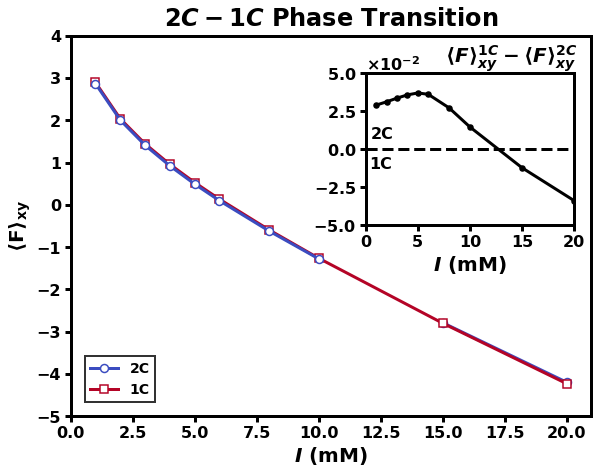

In [ ]:
#@title
def F_add(A):  return [A[0], A[1] - (200-A[2]) *2*A[0]*1e-03 *6.022e23*1e3*1e-9**3, A[2]]

sep = [[1.0, 2.92722e+00, 150], [2.0, 2.12526e+00, 150], [3.0, 1.59109e+00, 150], [4.0, 1.16356e+00, 150], [5.0, 7.93406e-01, 150],
          [6.0,  4.60185e-01, 150], [8.0, -1.35830e-01, 150], [10, -6.73479e-01, 150], [15, -1.88256e+00, 150], [20, -2.98988e+00, 150]] 
coll = [ [1.0, 2.98035e+00, 130], [2.0,  2.15648e+00, 150], [3.0, 1.62473e+00, 150], [4.0, 1.19933e+00, 150], [5.0, 8.30434e-01, 150], 
        [6.0, 1.07445e+00, 70], [8.0, 6.62218e-01, 70], [10, 3.04724e-01, 70], [15, -4.49376e-01, 70], [20, -1.09653e+00, 70]]

sep = pd.DataFrame(np.array([F_add(i) for i in sep]))
coll = pd.DataFrame(np.array([F_add(i) for i in coll]))
meta = pd.DataFrame(coll.iloc[:,1].values - sep.iloc[0:10,1].values)

f, ax = plt.subplots(1,1)
ins = inset_axes(ax, width="100%", height="100%", loc="upper right",
                    bbox_to_anchor=(.580, .52, .40, .40), bbox_transform=ax.transAxes)

ax.plot(sep.iloc[8:,0], sep.iloc[8:,1], 'o-',color=cool_blue, mew=1.5,ms=8, markerfacecolor='w', label="2C")
ax.plot(coll.iloc[:,0], coll.iloc[:,1], 's-',color=warm_red, mew=1.5,ms=8, markerfacecolor='w', label="1C")
ax.plot(sep.iloc[:8,0], sep.iloc[:8,1], 'o-',color=cool_blue, mew=1.5,ms=8, markerfacecolor='w', label="_Separated")
ins.plot(coll.iloc[:,0], meta.values, 'k.-', mew=1.5,ms=10)#, markerfacecolor='w')
ins.plot([0, 30], np.zeros(2), 'k--')

ins.set_title(r'            $\langle F \rangle_{xy}^{1C} - \langle F \rangle_{xy}^{2C}$', fontsize=20)
ins.text(0.08, 0.60, '2C', transform=ins.transAxes, fontsize=16,
        ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
ins.text(0.07, 0.40, '1C', transform=ins.transAxes, fontsize=16,
        ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))

ins.set_xlabel(r'$I$ (mM)')
ins.set_xlim([0,20])
ins.set_ylim([-0.05, 0.050])

ax.set_title(r"$2C - 1C$ Phase Transition")
ax.set_xlabel(r'$I$ (mM)')
ax.set_ylabel(r'$\mathbf{\langle F \rangle_{xy}}$')
ax.set_xlim(0, 21)
ax.set_ylim(-5, 4)

leg = ax.legend(loc = 3)
leg.get_frame().set_linewidth(2.0)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ins.yaxis.set_major_formatter(formatter) 

plt.show()

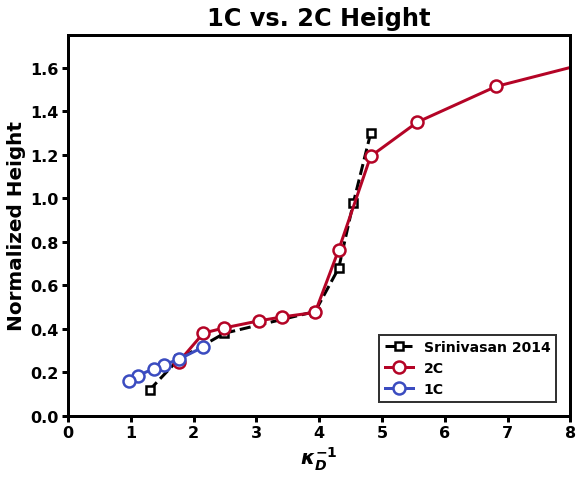

In [ ]:
#@title
SrCs = [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 75, 100]

Sr_coll = [37.1304, 32.92956868537666, 29.804057887120116, 27.174716927453765, 24.80096338837042, 22.52241056603773, 17.128178669097537, 5.671889048106448, 5.492755796178344, 5.367826231386024, 5.2014312267657985, 5.089542296436564, 5.010709338453482, 4.88395817354566, 4.811306562193927]
Sr_sep = [36.19401895734597, 31.81323542435424, 28.377395881006862, 25.07629581993569, 16.050486486486488, 9.991462668298654, 9.555869170984455, 9.191064618165386, 8.499643355392594, 7.995791556728231, 5.2014312267657985]

SrCs2 = [20, 30, 40, 50, 75, 100]
Sr_coll = [47.5438977384464, 39.0237249034749, 35.23798575667655, 32.57619764537995, 27.767241078789308, 24.175394746311625]

Sr_coll = np.divide(Sr_coll, 150)
Sr_sep = np.divide(Sr_sep, 21)

CsDeb = [1/Kap_D(i*1e-3)*1e9 for i in SrCs]
CsDeb2 = [1/Kap_D(i*1e-3)*1e9 for i in SrCs2]

#Sr2014 pH2.4 fitted in Illustrator
x = [4, 4.5, 5, 6, 15, 30, 55]
y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]
xDeb = [1/Kap_D(i*1e-3)*1e9 for i in x]

f, ax = plt.subplots(1,1, figsize=(9,7))

ax.plot(xDeb, y, 'ks--', markerfacecolor='w', mew=2.5,ms=8,label="Srinivasan 2014")
ax.plot(CsDeb[:len(Sr_sep)], Sr_sep, 'o-',color=lighten_color(warm_red, 1.0), mew=2.5,ms=12,markerfacecolor='w', label="2C")
ax.plot(CsDeb2, Sr_coll, 'o-',color=lighten_color(cool_blue, 1.0), mew=2.5,ms=12,markerfacecolor='w', label="1C")
#ax.plot(CsDeb, Sr_equil, 'o-',color="0.", mew=2.5,ms=12,markerfacecolor='w', zorder=3, label="Equil")

ax.set_title(r"1C vs. 2C Height")
ax.set_ylim(0, 1.75)
ax.set_xlim(0,8)

ax.set_xlabel(r'$\kappa_D^{-1}$')
ax.set_ylabel('Normalized Height')

leg = ax.legend(loc = 4)
leg.get_frame().set_linewidth(2.0)

plt.show()

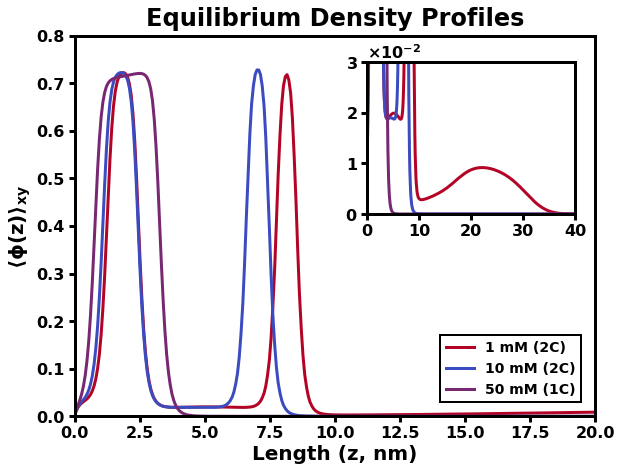

In [ ]:
#@title
read_list = ['2p_0100', '260_10', '260_50'] 
labels = ['1 mM (2C)', '10 mM (2C)', '50 mM (1C)']
lss = ['-', '-', '-', '-']

div = [0.6]*11
block_Num = len(read_list)
block_Ni = [[7]]*len(read_list) 
colors = [warm_red, cool_blue, mix_purp]
colors_i = [colors[i] for i in range(len(read_list))]

fig, ax = plt.subplots() 
ins = inset_axes(ax, width="100%", height="100%", loc="upper right",
                    bbox_to_anchor=(.575, .55, .40, .40), bbox_transform=ax.transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']


  df = pd.read_csv("ph"+read_list[k]+".dat", sep="\s+", skiprows=0, names=names)

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  step = 1

  """for j in range(len(block_Nik)):
    ax.plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=lighten_color(colors_i[k], amount=0.00),label='_Total')

    for i in range(block_Nik[j]):
      if i==0: ax.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=lighten_color(colors_i[k], amount=0.60),label='_Block')

    step += block_Nik[j]
  """
  ax.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], color=colors[k], ls= lss[k], label=labels[k])
  ins.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], color=colors[k], ls = lss[k])

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]

ax.set_title("Equilibrium Density Profiles")
ax.set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
ax.set_xlabel("Length (z, nm)")
ax.set_yscale('linear')
ax.set_ylim(0, 0.80)
ax.set_xlim(0, 20)

leg = ax.legend(loc = 4, ncol = 1, framealpha=1.0)
leg.get_frame().set_linewidth(2.0)

ins.set_ylim(0, 0.03)
ins.set_xlim(0, 40)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ins.yaxis.set_major_formatter(formatter) 

plt.show()
  

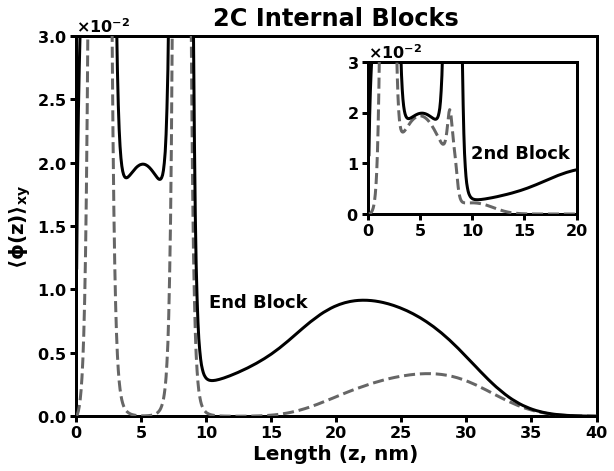

In [ ]:
#@title
read_list = ['0100'] 

div = [0.6]*11
block_Num = len(read_list)
block_Ni = [[7]]*len(read_list) 
colors = ['k']
colors_i = [colors[i] for i in range(len(read_list))]

fig, ax = plt.subplots() 
ins = inset_axes(ax, width="100%", height="100%", loc="upper right",
                    bbox_to_anchor=(.575, .55, .40, .40), bbox_transform=ax.transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']


  df = pd.read_csv("ph2p_"+read_list[k]+".dat", sep="\s+", skiprows=0, names=names)

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  step = 1

  for j in range(len(block_Nik)):
    ax.plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=lighten_color(colors_i[k], amount=0.00),label='_Total')

    for i in range(block_Nik[j]):
      if i==6: ax.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=lighten_color(colors_i[k], amount=0.60),label='_Block')
      if i==1: ins.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--', zorder = 3, color=lighten_color(colors_i[k], amount=0.60),label="_Block")

    step += block_Nik[j]

  ax.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00), label=labels[k])
  ins.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00))

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]

ax.set_title('2C Internal Blocks')
ax.text(0.35, 0.30, 'End Block', transform=ax.transAxes, fontsize=18,
        ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
ins.text(0.73, 0.40, '2nd Block', transform=ins.transAxes, fontsize=18,
        ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))

ax.set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
ax.set_xlabel("Length (z, nm)")
ax.set_yscale('linear')
ax.set_ylim(0, 0.030)
ax.set_xlim(0, 40)

ins.set_ylim(0, 0.03)
ins.set_xlim(0, 20)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ins.yaxis.set_major_formatter(formatter) 
ax.yaxis.set_major_formatter(formatter) 

plt.show()
  
  

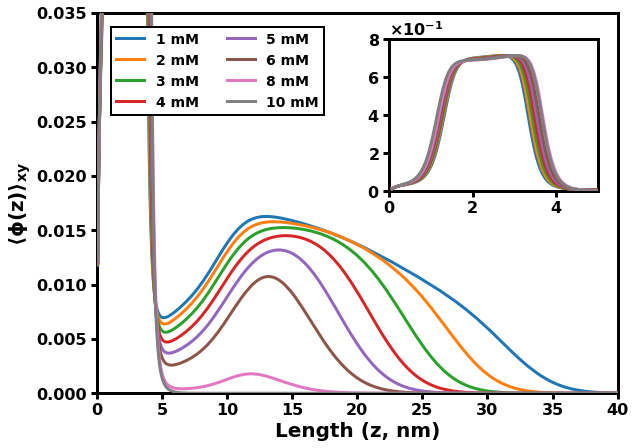

In [ ]:
#@title
read_list = ['0100', '0200', '0300', '0400', '0500', 'c0600', 'c0800', 'c10'] 
labels = ['1', '2', '3', '4', '5', '6', '8', '10']
labels = [i+' mM' for i in labels]

div = [0.6]*len(read_list)
block_Num = len(read_list)
block_Ni = [[7]]*len(read_list) 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
colors_i = [colors[i] for i in range(len(read_list))]

fig, ax = plt.subplots() 
ins = inset_axes(ax, width="100%", height="100%", loc="upper right",
                    bbox_to_anchor=(.575, .55, .40, .40), bbox_transform=ax.transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']


  df = pd.read_csv("ph260_"+read_list[k]+".dat", sep="\s+", skiprows=0, names=names)

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  step = 1

  """for j in range(len(block_Nik)):
    ax.plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=lighten_color(colors_i[k], amount=0.00),label='_Total')

    for i in range(block_Nik[j]):
      if i==0: ax.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=lighten_color(colors_i[k], amount=0.60),label='_Block')
      if i==0: ins.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--', zorder = 3, color=lighten_color(colors_i[k], amount=0.60),label="_Block")

    step += block_Nik[j]
"""
  ax.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00), label=labels[k])
  ins.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00))

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]

#ins.plot([0,50], np.ones(2)*1e-4, '--k')

#ax.set_title('NFH Polymer Density Profiles')
ax.set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
ax.set_xlabel("Length (z, nm)")
ax.set_yscale('linear')
ax.set_ylim(0, 0.035)
ax.set_xlim(0, 40)

leg = ax.legend(loc = 2, ncol = 2, framealpha=1.0)
leg.get_frame().set_linewidth(2.0)

ins.set_ylim(0, 0.80)
ins.set_xlim(0, 5)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ins.yaxis.set_major_formatter(formatter) 

plt.show()
  

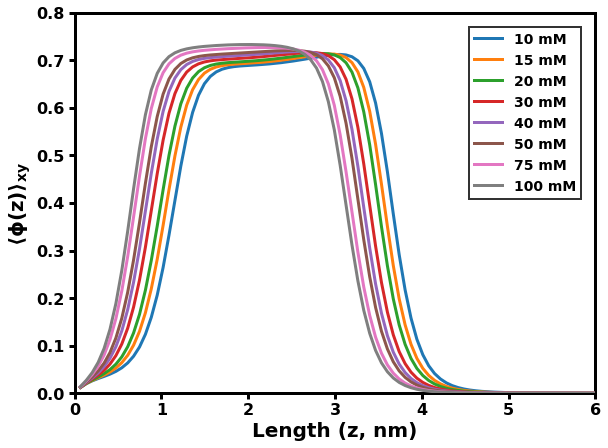

In [ ]:
#@title
read_list = ['260_c10', '260_c15', '260_c20', '260_30', '260_40', '260_50', '260_75', '260_100'] 
labels = ['10', '15', '20', '30', '40', '50', '75', '100'] 
labels = [i+' mM' for i in labels]

div = [0.6]*len(read_list)
block_Num = len(read_list)
block_Ni = [[7]]*len(read_list) 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
colors_i = [colors[i] for i in range(len(read_list))]

fig, ax = plt.subplots() 
#ins = inset_axes(ax, width="100%", height="100%", loc="upper right",
#                    bbox_to_anchor=(.575, .55, .40, .40), bbox_transform=ax.transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']


  df = pd.read_csv("ph"+read_list[k]+".dat", sep="\s+", skiprows=0, names=names)

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  step = 1

  """for j in range(len(block_Nik)):
    ax.plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=lighten_color(colors_i[k], amount=0.00),label='_Total')

    for i in range(block_Nik[j]):
      if i==0: ax.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=lighten_color(colors_i[k], amount=0.60),label='_Block')

    step += block_Nik[j]
"""
  ax.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00), label=labels[k])

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]


#ax.set_title('NFH Polymer Density Profiles')
ax.set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
ax.set_xlabel("Length (z, nm)")
ax.set_yscale('linear')
ax.set_ylim(0, 0.80)
ax.set_xlim(0, 6)

leg = ax.legend(loc = 1, ncol = 1)
leg.get_frame().set_linewidth(2.0)


plt.show()
  

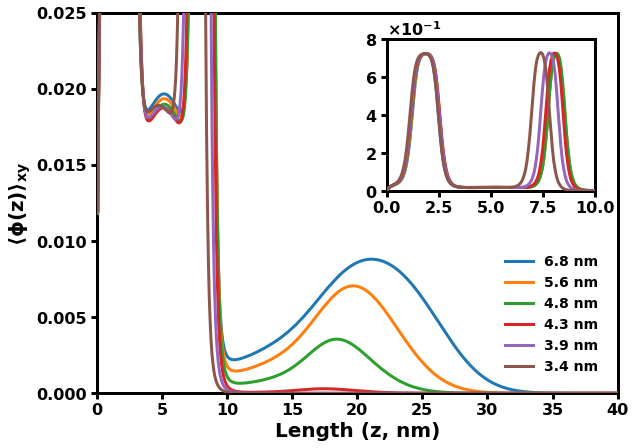

In [ ]:
#@title
# read_list = ['2p_0100', '2p_0200', '2p_0300', '2p_0400', '2p_0500', '260_0600', '260_0800', '260_10', '260_15', '260_20'] 
# labels = ['1', '2', '3', '4', '5', '6', '8','10', '15', '20'] 
read_list = ['2p_0200', '2p_0300', '2p_0400', '2p_0500', '260_0600', '260_0800'] 
labels = [2, 3, 4, 5, 6, 8, 10, 15, 20] 
labels = ["{:.1f}".format(1/Kap_D(i*1e-03)*1e9) for i in labels]
labels = [i+" nm" for i in labels]

div = [0.6]*len(read_list)
block_Num = len(read_list)
block_Ni = [[7]]*len(read_list) 
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
colors_i = [colors[i] for i in range(len(read_list))]

fig, ax = plt.subplots() 
ins = inset_axes(ax, width="100%", height="100%", loc="upper right",
                    bbox_to_anchor=(.570, .55, .40, .40), bbox_transform=ax.transAxes)

for k in range(len(read_list)):
  block_Nik = block_Ni[k]

  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']


  df = pd.read_csv("ph"+read_list[k]+".dat", sep="\s+", skiprows=0, names=names)

  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  step = 1

  """for j in range(len(block_Nik)):
    ax.plot(np.multiply(phAT.iloc[1:,0], div[k]), phAT.iloc[1:,j+1], '-',  zorder=2, color=lighten_color(colors_i[k], amount=0.00),label='_Total')

    for i in range(block_Nik[j]):
      if i==0: ax.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--',  zorder=3, color=lighten_color(colors_i[k], amount=0.60),label='_Block')
      if i==0: ins.plot(np.multiply(ph1r.iloc[1:,0], div[k]), ph1r.iloc[1:,i+step], '--', zorder = 3, color=lighten_color(colors_i[k], amount=0.60),label="_Block")

    step += block_Nik[j]
"""
  ax.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00), label=labels[k])
  ins.plot(np.multiply(phAr.iloc[1:,0], div[k]), phAr.iloc[1:,1], zorder = 3, color=lighten_color(colors_i[k], amount=1.00))

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors_i]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]


ax.set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
ax.set_xlabel("Length (z, nm)")
ax.set_yscale('linear')
ax.set_ylim(0, 0.025)
ax.set_xlim(0, 40)

# leg = ax.legend(loc = 2, bbox_to_anchor=(0.24, 1.00), frameon=False)
leg = ax.legend(loc = 4, frameon=False)
# leg.get_frame().set_linewidth(2.0)

ins.set_ylim(0, 0.80)
ins.set_xlim(0, 10)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ins.yaxis.set_major_formatter(formatter) 

plt.show()
  

Charge Block 1: [0 29] = 0.204967
Charge Block 2: [29 87] = 0.027801
Charge Block 3: [87 319] = 0.170493
Charge Block 4: [319 609] = 0.261110
Charge Block 5: [609 647] = 0.336030


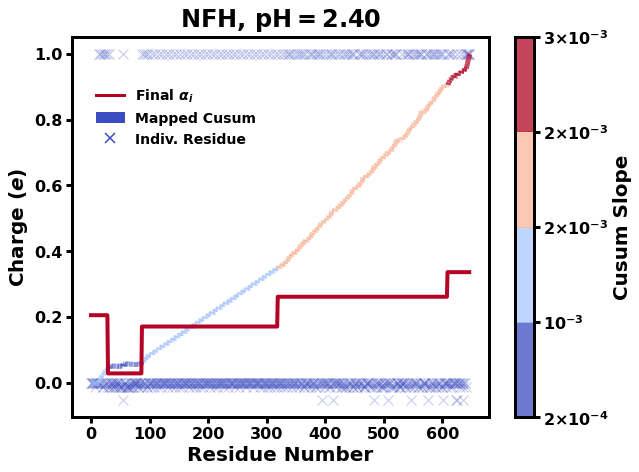

Charge Block 1: [0 29] = 0.204967
Charge Block 2: [29 87] = 0.027801
Charge Block 3: [87 319] = 0.170493
Charge Block 4: [319 609] = 0.261110
Charge Block 5: [609 647] = 0.336030


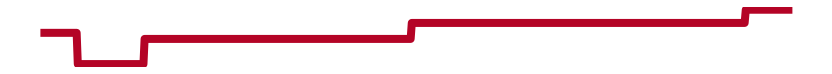

In [ ]:
#@title
ph = 2.4

f, ax2 = plt.subplots()
ax2.plot(charge_dist_ph(H_seq, ph), 'x', color=cool_blue, alpha=0.3, zorder = 0) #Raw Data

smear = 29
block_N = 4

[lc, dydx, norm_set] = Discr_cumsum_ph(H_seq, block_N, smear, ph)
lc.set_alpha(0.75)
line = ax2.add_collection(lc) #Cumsum Data

f1 = ticker.ScalarFormatter(useOffset=False, useMathText=True)
f1.set_scientific(True)
g1 = lambda x,pos : "${}$".format(f1._formatSciNotation('%.0e' % x))
f.colorbar(line, label = "Cusum Slope".format(block_N), 
           format = ticker.FuncFormatter(g1), ax=ax2)

H_NsK_s = find_charge_change(dydx, norm_set)
H_NsK = [H_NsK_s[0]] + [H_NsK_s[i+1] - H_NsK_s[i] for i in range(len(H_NsK_s)-1)] #Convert to length of each block
ax2.plot(find_charge_avg_ph(H_seq, H_NsK, ph),  '-', color=warm_red, lw=4, zorder = 10) #Final Charge Dist

ax2.set_title("Block_N={:d}, ".format(block_N)+ r"$\mathbf{Avg_{smear}}$"+" ={:d} points, ".format(smear)+"pH={:.2f}".format(ph), fontweight='bold')
ax2.set_title("NFH, pH"r"$=2.40$")
ax2.set_xlabel("Residue Number")
ax2.set_ylabel("Charge "r"$(e)$")

custom_legend = [
                  Line2D([0], [0], color=warm_red, ls ='-', lw=3),
                  Patch(color=cool_blue),
                  Line2D([0], [0], color=cool_blue, marker='x', ls='', alpha=1.0, mew = 1.5)
                ]
leg = ax2.legend(custom_legend,[r"Final $\alpha_{i}$", "Mapped Cusum","Indiv. Residue"],bbox_to_anchor=(0.01, 0.92), loc="upper left")
leg.get_frame().set_linewidth(0.0)

plt.savefig("NFH_block.png", transparent='true')
#files.download("NFH_block.png")
plt.show()

rect_size = (11/0.75, 1.1)
f = plt.figure(figsize=rect_size)

plt.plot(find_charge_avg_ph(H_seq, H_NsK, ph),  '-', color=warm_red, lw=8) #Final Charge Dist
plt.axis('off')
plt.savefig('H_charge.png', transparent='true')

#plt.plot(find_chi_avg(H_seq, H_NsK),  '--', color=warm_red, lw=8) #Final Charge Dist
#plt.axis('off')
#plt.savefig('H_chi.png', transparent='true')

plt.show()


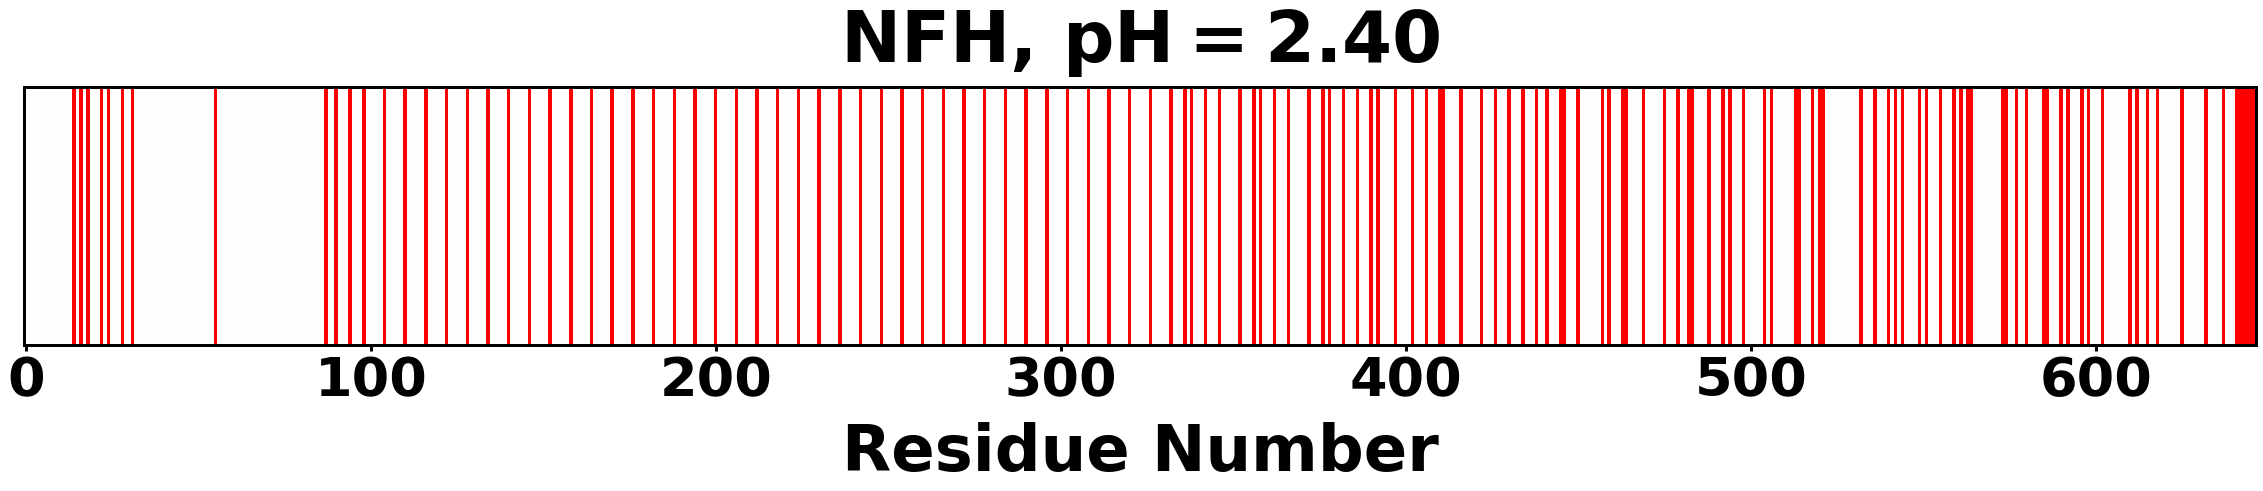

In [ ]:
#@title
sequence = H_seq
ph = 2.4

f, ax = plt.subplots(1,1,figsize=(40,7))
cmap = plt.cm.bwr #CHOOSE CMAP TYPE
cmaplist = [cmap(i) for i in range(cmap.N)] # extract all colors from the cmap
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N) #new cmap
N = 5
norm_set = np.linspace(-1,1,N+1)
norm = BoundaryNorm(norm_set, cmap.N)

a = charge_dist_ph(sequence, ph)
a = np.expand_dims(a, axis=0)
im = ax.imshow(a, cmap, norm=norm, aspect=75)
plt.xticks(np.arange(0, 651, 100), fontsize="54")
plt.title("NFH, pH"r"$=2.40$", fontsize="72", pad=25)
plt.xlabel("Residue Number", fontsize="64", labelpad=15)
f.set_facecolor("white")
ax.get_yaxis().set_visible(False)

#f.colorbar(im)
plt.show()

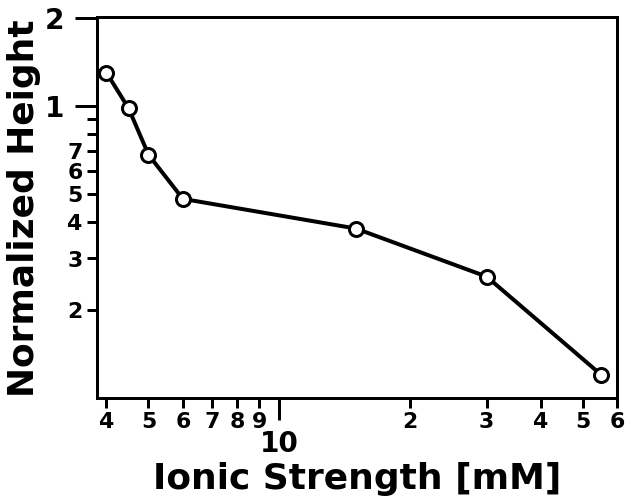

In [ ]:
# Fits for Sr 2014

fig, ax = plt.subplots(1,1)

x = [4, 4.5, 5, 6, 15, 30, 55]
y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]

ax.plot(x,y,'-ko', markerfacecolor='white', mew=3, ms=14, lw=4)
plt.ylabel('Normalized Height', fontsize=36)
plt.xlabel('Ionic Strength [mM]', fontsize=36)
plt.tick_params(axis='both', which='major', length=22, pad=10, labelsize=28)
plt.tick_params(axis='both', which='minor', length=10, pad=4, labelsize=22)
ax.set_yscale('log')
ax.set_ylim([0.10, 2.01])
ax.set_yticks([1.0, 2.0], minor=False)
ax.set_yticklabels([1, 2], minor=False)
ax.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], minor=True)
ax.set_yticklabels([2, 3, 4, 5, 6, 7], minor=True)
ax.set_xscale('log')
ax.set_xlim([3.8, 60])
ax.set_xticks([10], minor=False)
ax.set_xticklabels([10], minor=False)
ax.set_xticks([4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60], minor=True)
ax.set_xticklabels([4, 5, 6, 7, 8, 9, 2, 3, 4, 5, 6], minor=True)
plt.show()